In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/irrigation_prediction.csv')

In [3]:
df1=df.copy()

In [4]:
df1.head()

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [6]:
df1.describe()

,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


In [7]:
df1.isnull().sum()

,0
Soil_Type,0
Soil_pH,0
Soil_Moisture,0
Organic_Carbon,0
Electrical_Conductivity,0
Temperature_C,0
Humidity,0
Rainfall_mm,0
Sunlight_Hours,0
Wind_Speed_kmh,0


In [8]:
df1

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


In [9]:
df1.tail()

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low
9999,Sandy,5.65,62.25,1.48,3.00,35.71,45.33,177.69,10.93,12.32,Potato,Harvest,Kharif,Canal,Rainwater,11.32,No,98.88,North,Medium


In [10]:
df1.shape

(10000, 20)

In [11]:
numeric_col=df1.select_dtypes(include=['int64','float64']).columns

In [12]:
df_numeric=df[numeric_col]

#Numerical columns represent measurable quantities and are suitable for statistical analysis, scaling, and correlation-based modeling.

In [13]:
df_numeric

,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,4.73,1.98
1,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,12.22,33.56
2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,5.52,34.62
3,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,1.43,84.03
4,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,2.52,60.86
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,2.62,92.44
9996,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,4.87,15.46
9997,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,10.08,116.36
9998,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,11.11,118.17


In [14]:
category_col=df1.select_dtypes(include=['object','category']).columns

In [15]:
df_category=df[category_col]

#Categorical columns represent qualitative information and require encoding techniques (such as Label Encoding or One-Hot Encoding) before being used in machine learning models.

In [16]:
df_category

,Soil_Type,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Mulching_Used,Region,Irrigation_Need
0,Clay,Wheat,Vegetative,Rabi,Rainfed,Reservoir,Yes,South,Low
1,Silt,Maize,Flowering,Zaid,Canal,Groundwater,Yes,Central,Medium
2,Sandy,Cotton,Harvest,Rabi,Drip,Reservoir,Yes,South,Low
3,Clay,Wheat,Sowing,Kharif,Canal,Reservoir,Yes,North,Medium
4,Clay,Cotton,Sowing,Zaid,Canal,River,No,South,Medium
...,...,...,...,...,...,...,...,...,...
9995,Silt,Sugarcane,Sowing,Kharif,Drip,Groundwater,Yes,South,Low
9996,Clay,Maize,Sowing,Kharif,Rainfed,Groundwater,No,South,Low
9997,Loamy,Potato,Harvest,Kharif,Canal,Groundwater,Yes,North,Low
9998,Loamy,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,Yes,East,Low


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


#Histograms show the distribution of numerical features, helping identify skewness, spread, and frequency patterns.

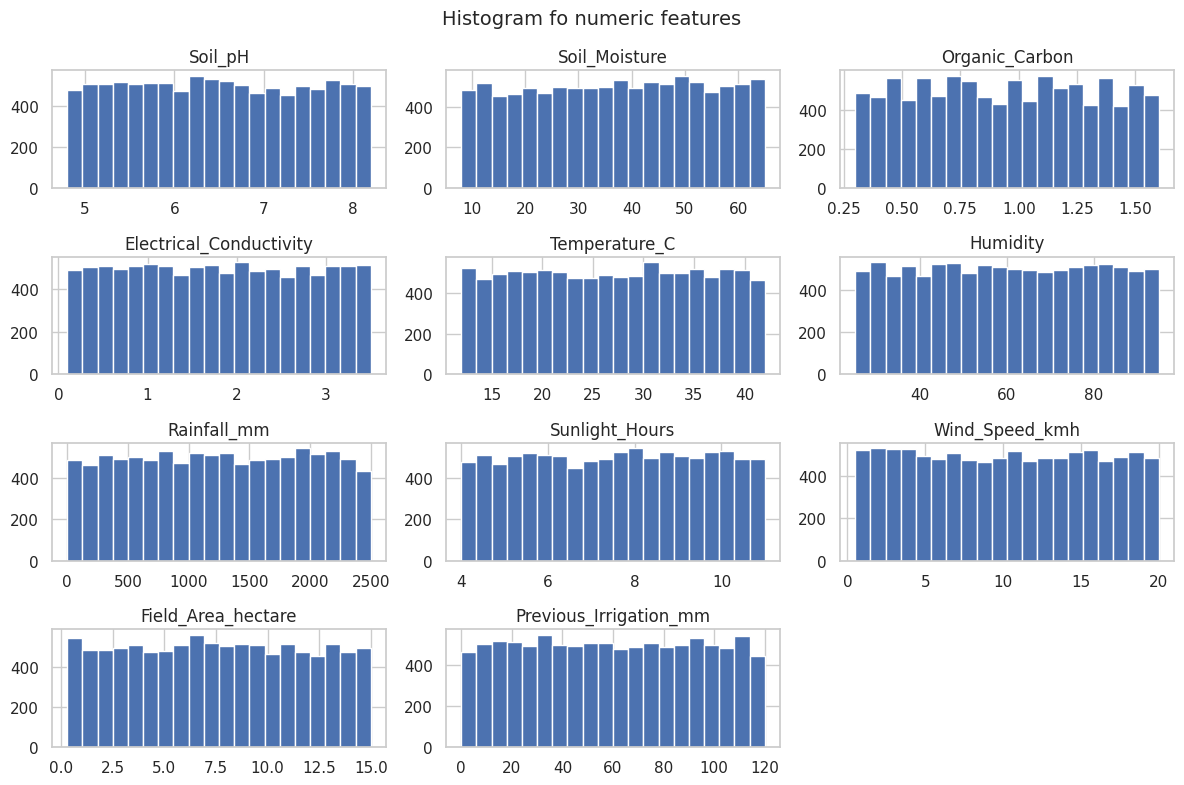

In [18]:
df_numeric.hist(figsize=(12,8),bins=20)
plt.suptitle("Histogram fo numeric features",fontsize=14)
plt.tight_layout()
plt.show()

#Boxplots help detect outliers and understand variability across numerical features.

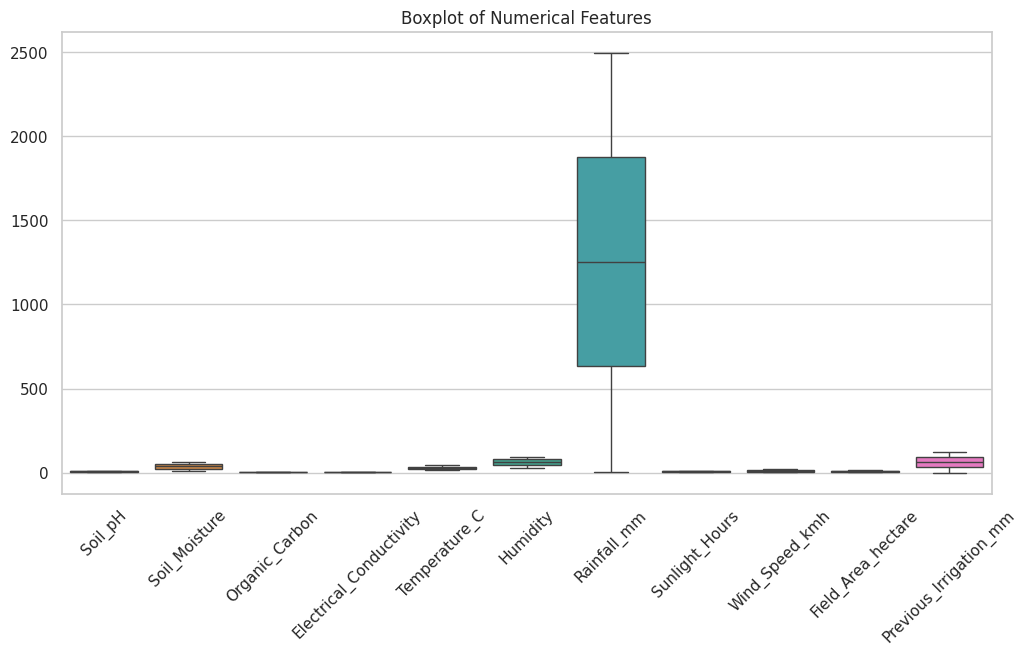

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

#KDE plots provide a smooth estimate of feature distributions, making it easier to observe density and overlap between values.

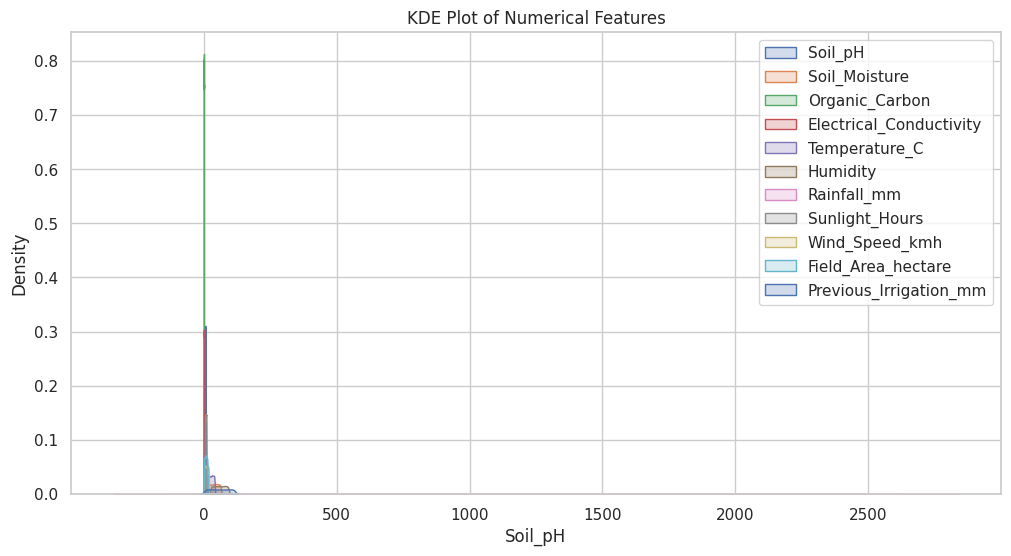

In [20]:
plt.figure(figsize=(12,6))
for col in df_numeric.columns:
    sns.kdeplot(df_numeric[col], label=col, fill=True)
plt.title("KDE Plot of Numerical Features")
plt.legend()
plt.show()

#Subplots allow us to visualize distributions of all numerical features simultaneously, making it easier to compare spread, skewness, and patterns across variables.

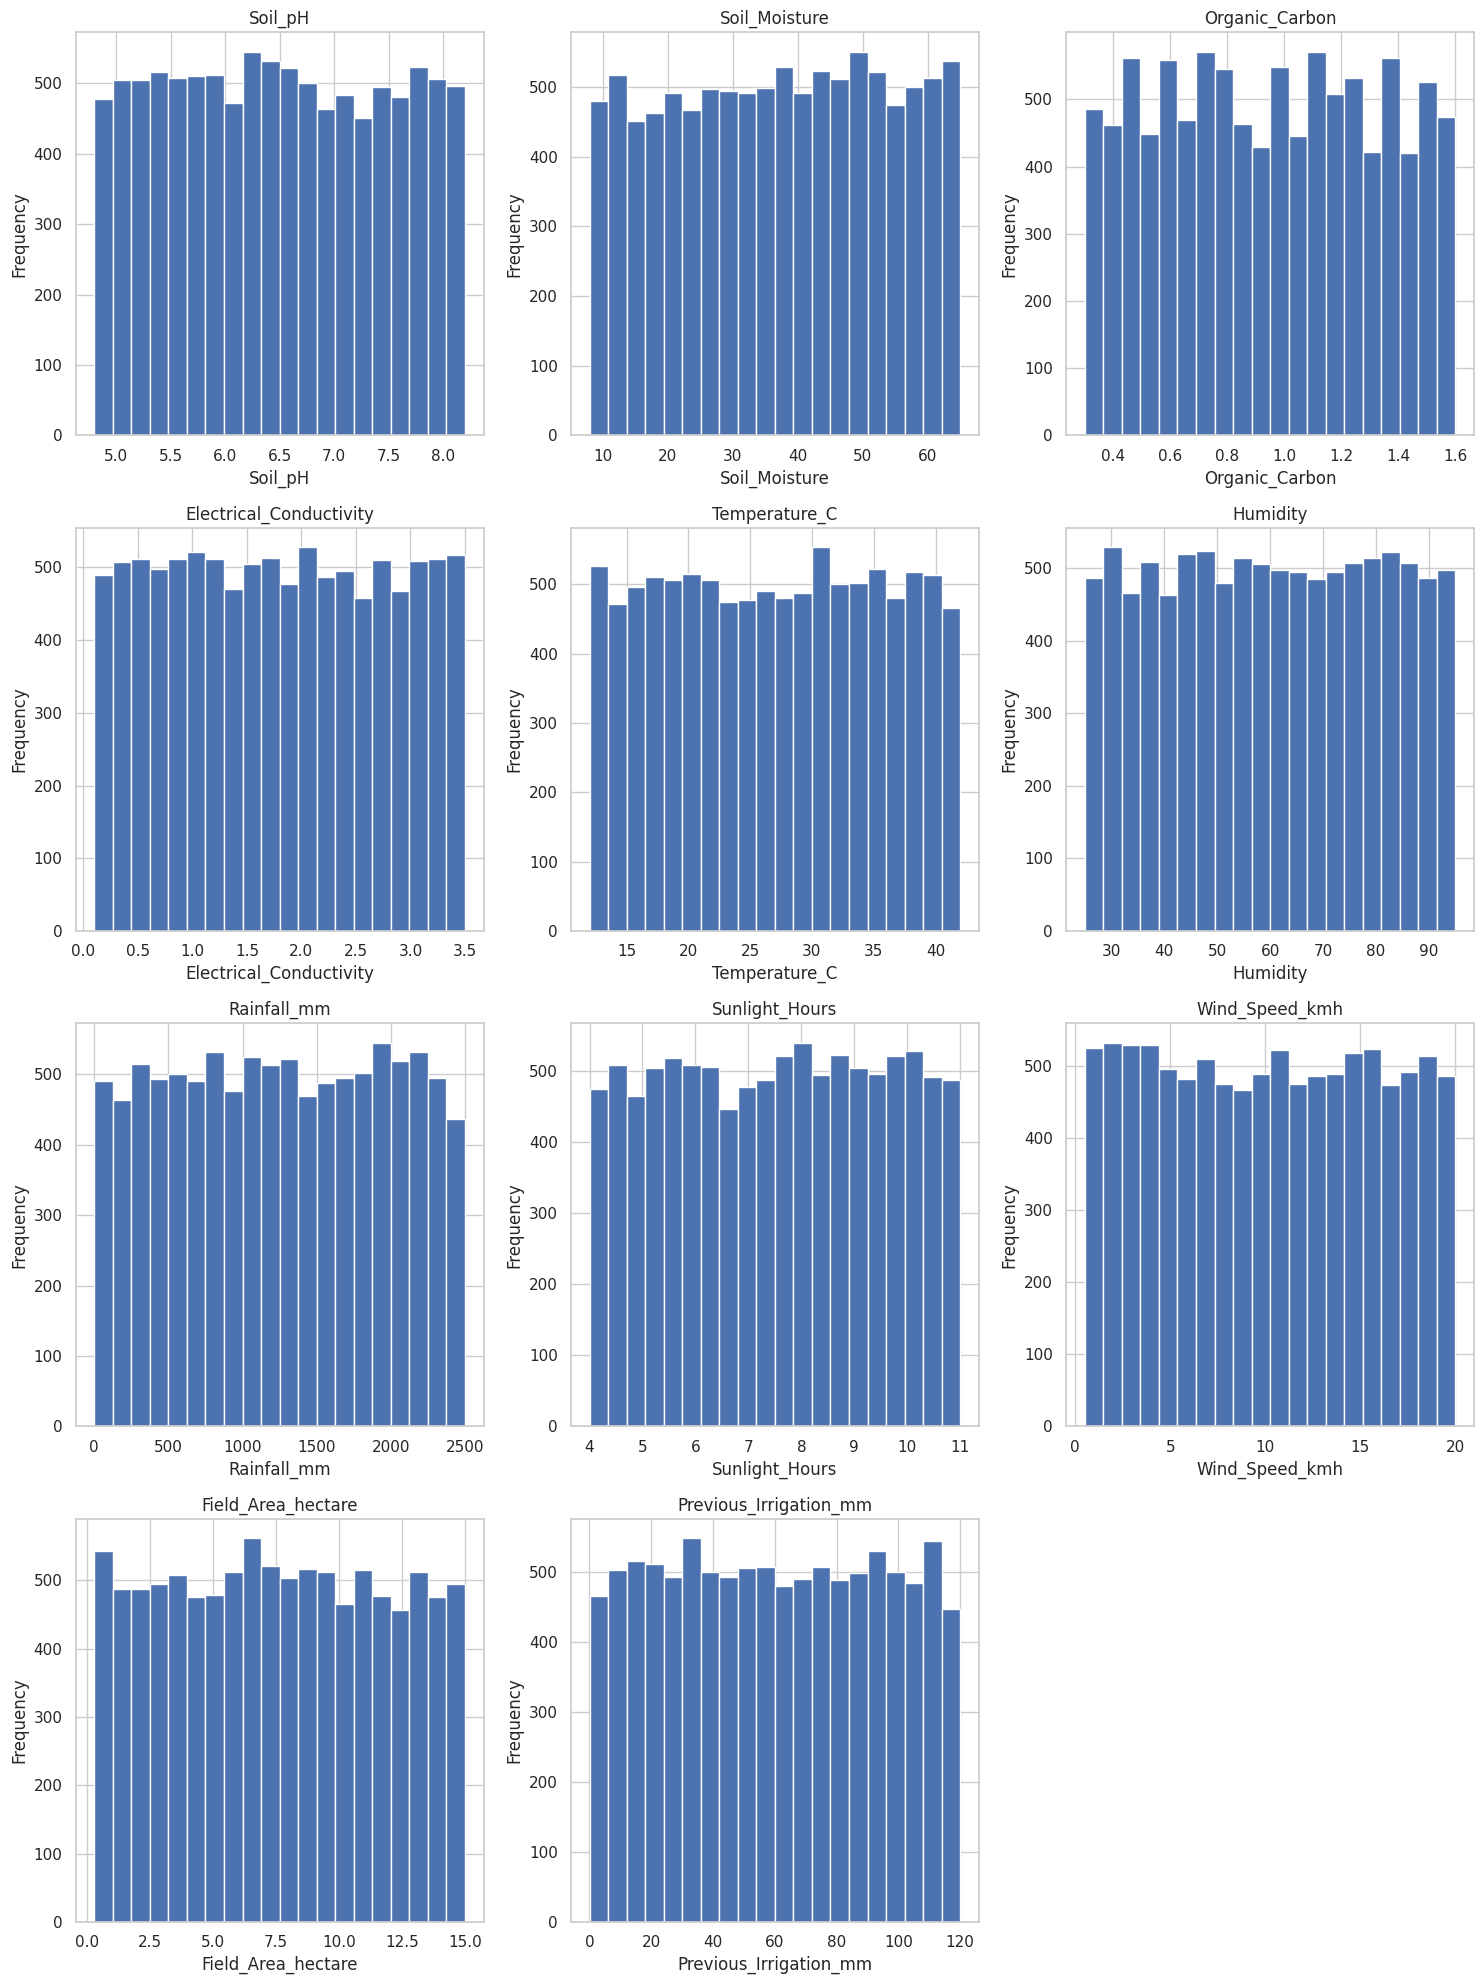

In [21]:
# Subplots for Numerical Feature Histograms

import matplotlib.pyplot as plt

num_cols = df_numeric.columns
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_numeric[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#The heatmap shows the strength and direction of relationships among numerical features. Strong positive or negative correlations indicate dependent features, while near-zero values suggest independence. Highly correlated variables may cause multicollinearity and can be reduced during feature selection to improve model performance.

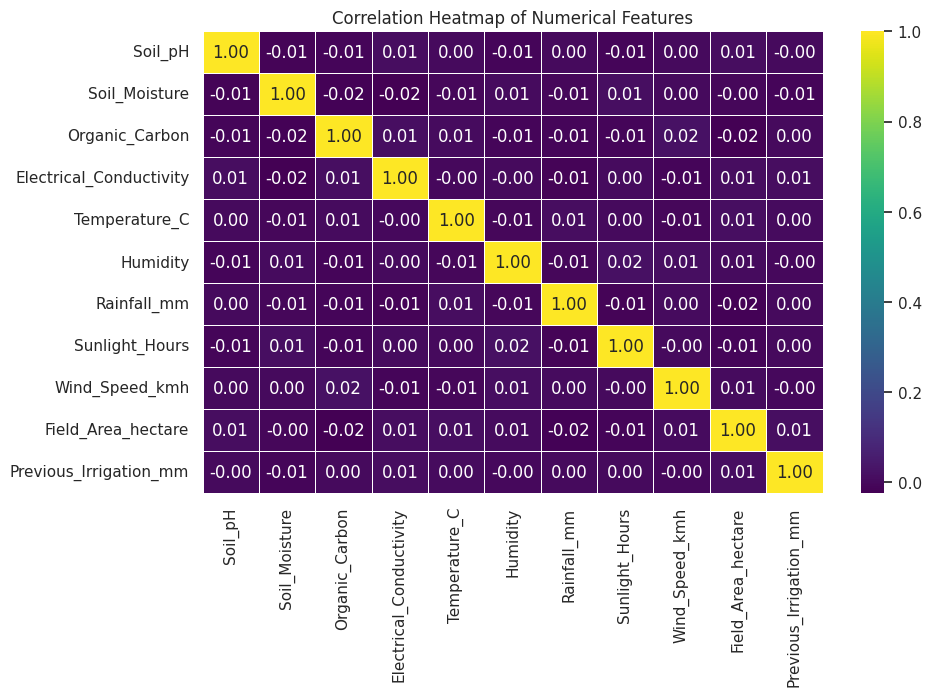

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap with different color
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="viridis",   # changed color map
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


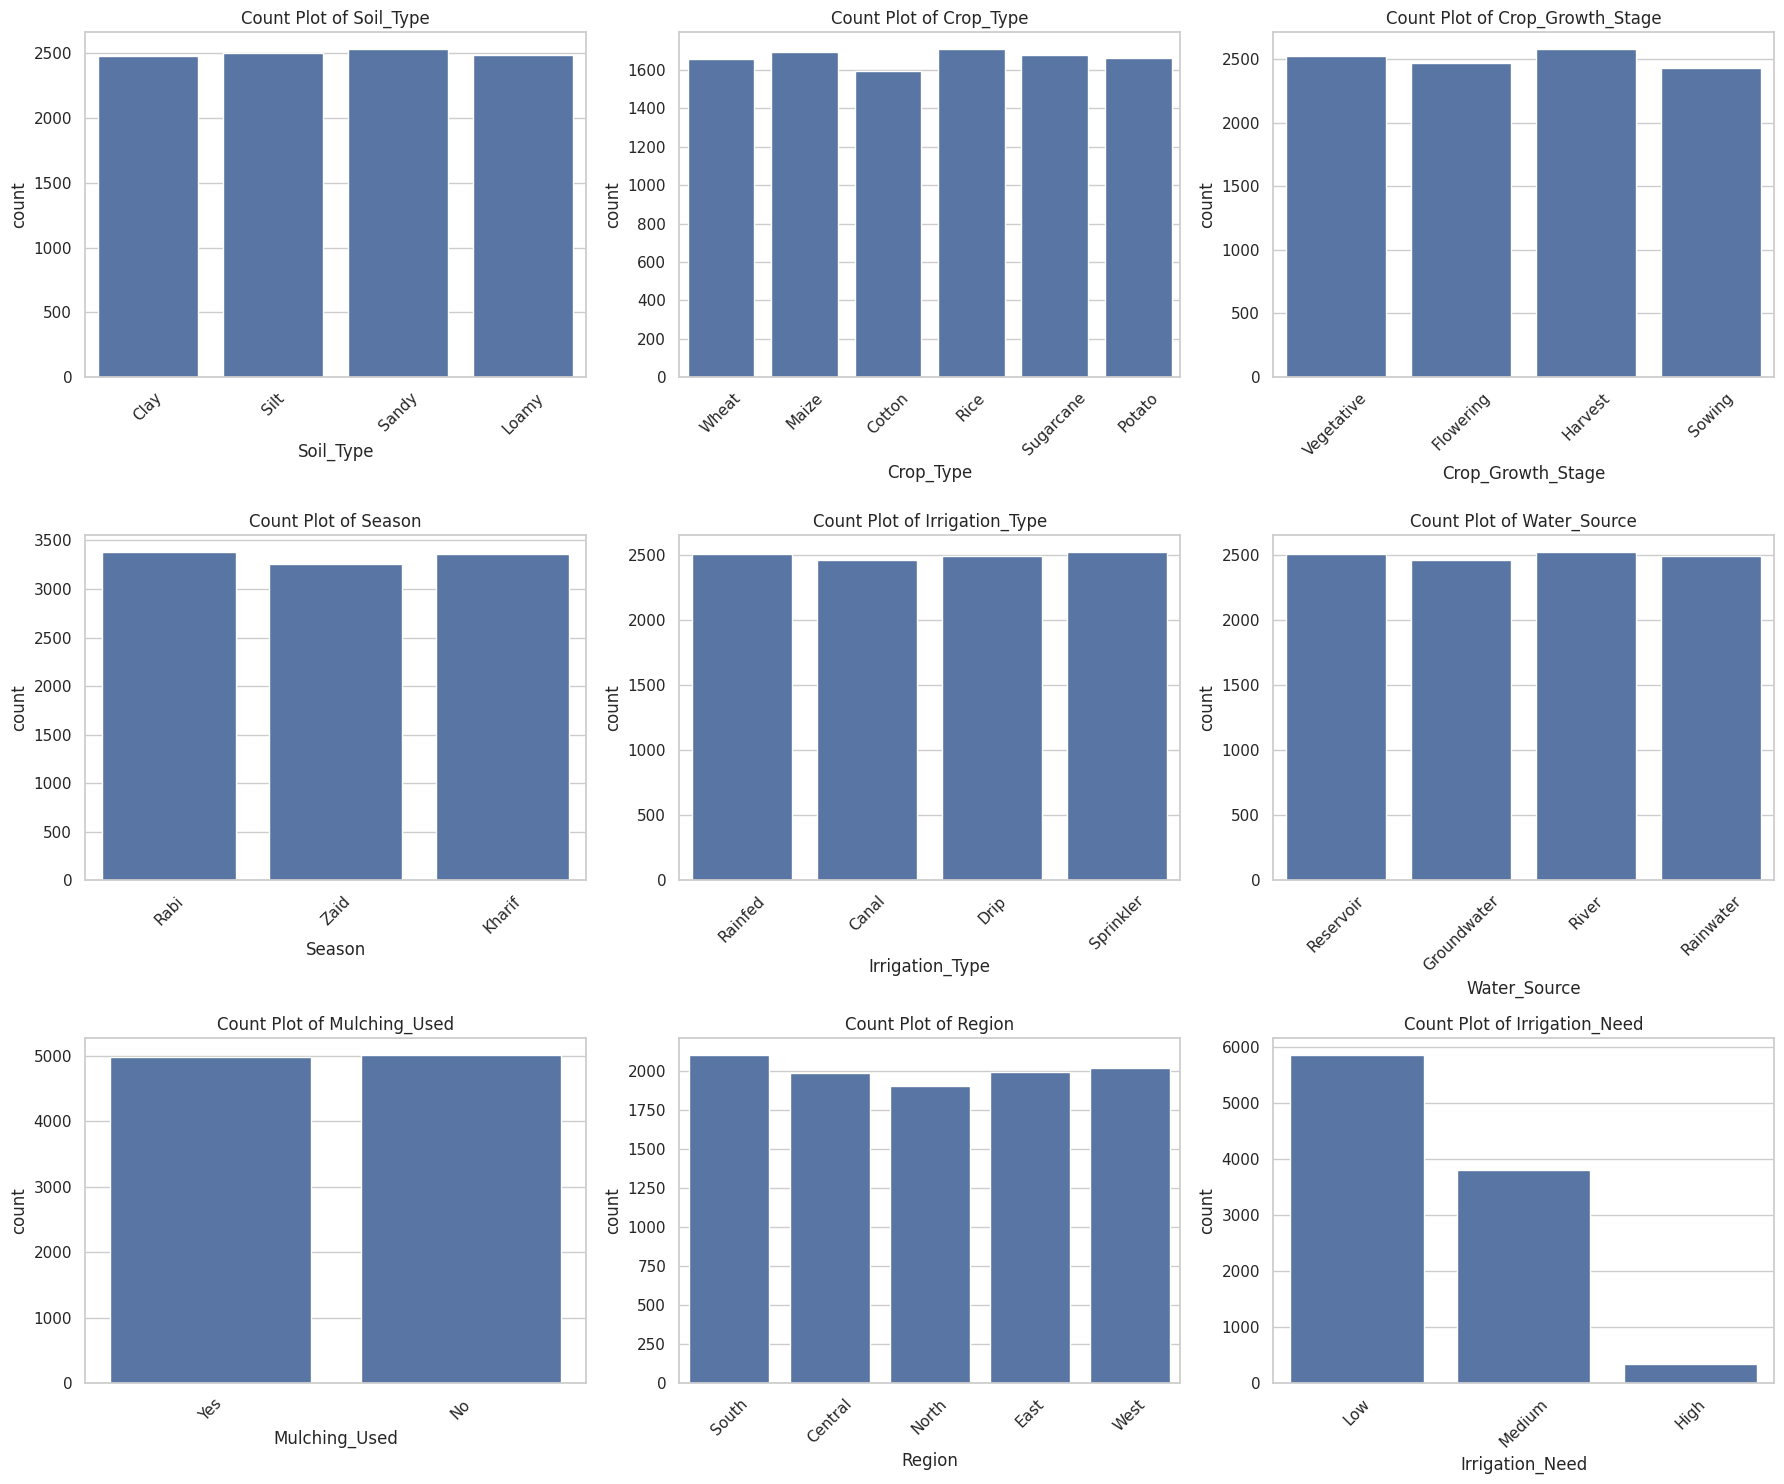

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid")

cols = df_category.columns
n_cols = 3                         # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()              # flatten for easy indexing

for i, col in enumerate(cols):
    sns.countplot(x=df_category[col], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


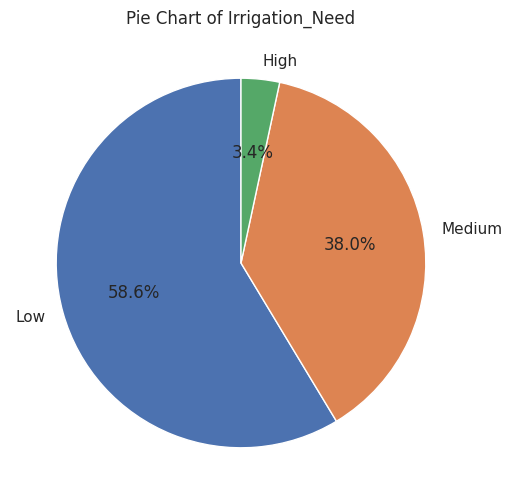

In [24]:
plt.figure(figsize=(6,6))
df_category[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90
    )
plt.title(f"Pie Chart of {col}")
plt.ylabel("")  # remove y-label
plt.show()

#EDA

In [44]:
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


In [45]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB




In [46]:
# =========================
# 2. LOAD DATA
# =========================
df = pd.read_csv("irrigation_prediction.csv")   # change path if needed

print("Dataset Shape:", df.shape)


Dataset Shape: (10000, 20)


In [47]:
# =========================
# 3. DEFINE TARGET
# =========================
target_col = "Irrigation_Need"

X = df.drop(columns=[target_col])
y = df[target_col]

In [48]:
# =========================
# 4. ENCODE CATEGORICAL COLUMNS (FIXES 'Sandy' ERROR)
# =========================
cat_cols = X.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

print("Categorical columns encoded ✔️")


Categorical columns encoded ✔️


In [49]:
# =========================
# 5. SCALE NUMERICAL COLUMNS
# =========================
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Numerical columns scaled ✔️")


Numerical columns scaled ✔️


In [50]:
# =========================
# 6. TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train-Test split done ✔️")



Train-Test split done ✔️


In [51]:
# =========================
# 7. DEFINE MODELS
# =========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [52]:
# =========================
# 8. TRAIN & EVALUATE MODELS
# =========================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    })

print("Model training completed ✔️")

Model training completed ✔️


In [53]:
# =========================
# 9. RESULTS DATAFRAME
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1-Score
3    Gradient Boosting    0.9965   0.996532  0.9965  0.996412
1        Decision Tree    0.9955   0.995512  0.9955  0.995504
2        Random Forest    0.9865   0.986823  0.9865  0.985616
4             AdaBoost    0.8905   0.914995  0.8905  0.885162
6                  SVM    0.8580   0.864302  0.8580  0.846752
7          Naive Bayes    0.8060   0.809436  0.8060  0.792987
0  Logistic Regression    0.7230   0.720370  0.7230  0.715202
5                  KNN    0.7220   0.709509  0.7220  0.706506


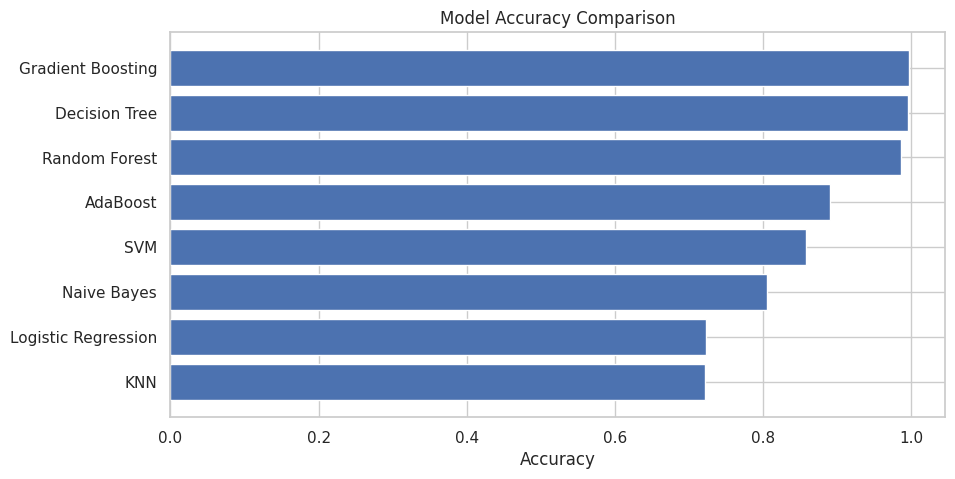

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(results_df['Model'], results_df['Accuracy'])
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-2797911311.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
/tmp/ipython-input-2797911311.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
/tmp/ipython-input-2797911311.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
/tmp/ipython-input-2797911311.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)


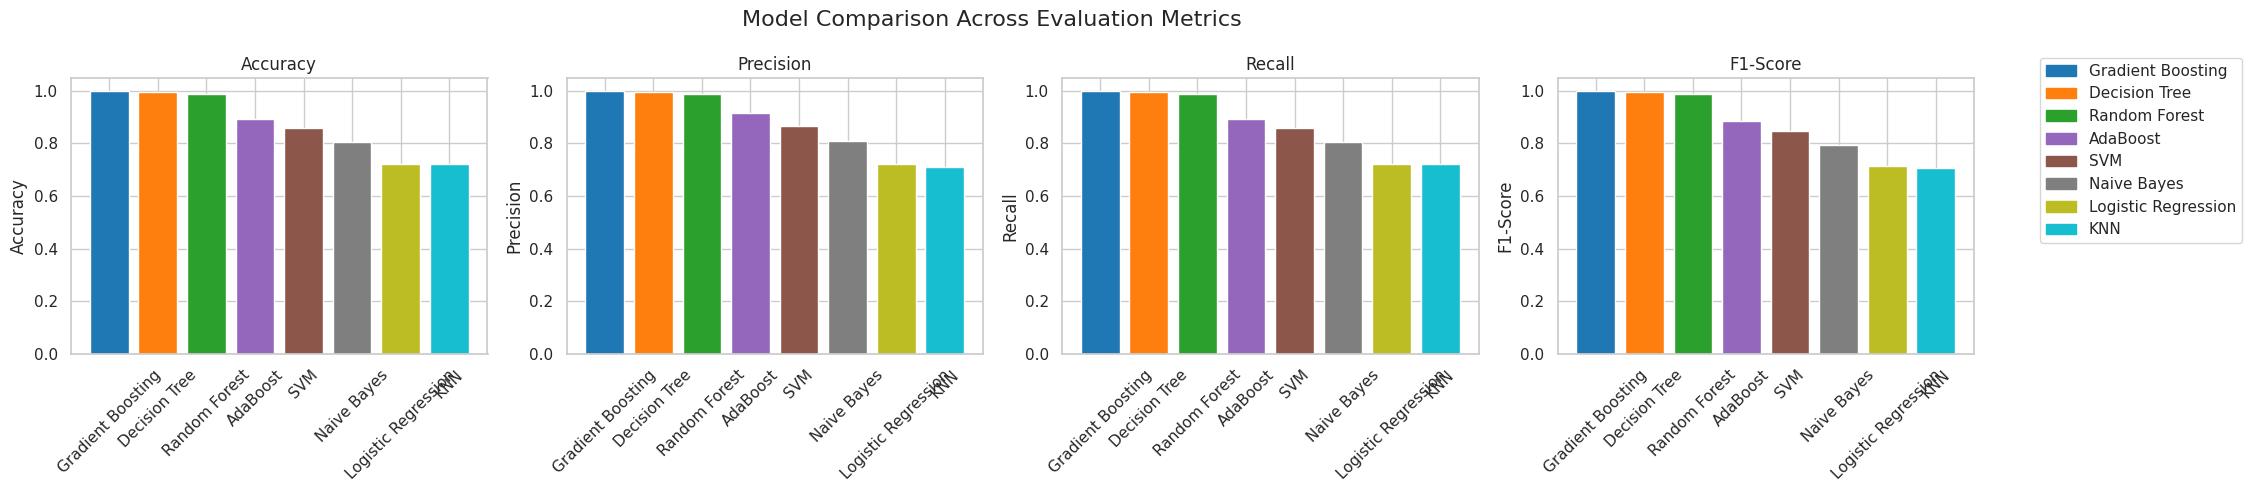

In [59]:
import matplotlib.pyplot as plt
import numpy as np

models = results_df['Model'].tolist()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Color map (consistent color per model)
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))
color_map = dict(zip(models, colors))

# Create subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(20,5), sharey=False)

for ax, metric in zip(axes, metrics):
    for model in models:
        ax.bar(
            model,
            results_df.loc[results_df['Model'] == model, metric].values[0],
            color=color_map[model]
        )

    ax.set_title(metric)
    ax.set_xticklabels(models, rotation=45)
    ax.set_ylabel(metric)

# Create single legend for all plots
handles = [plt.Rectangle((0,0),1,1,color=color_map[m]) for m in models]
fig.legend(handles, models, bbox_to_anchor=(1.02, 0.9), loc='upper left')

plt.suptitle("Model Comparison Across Evaluation Metrics", fontsize=16)
plt.tight_layout()
plt.show()


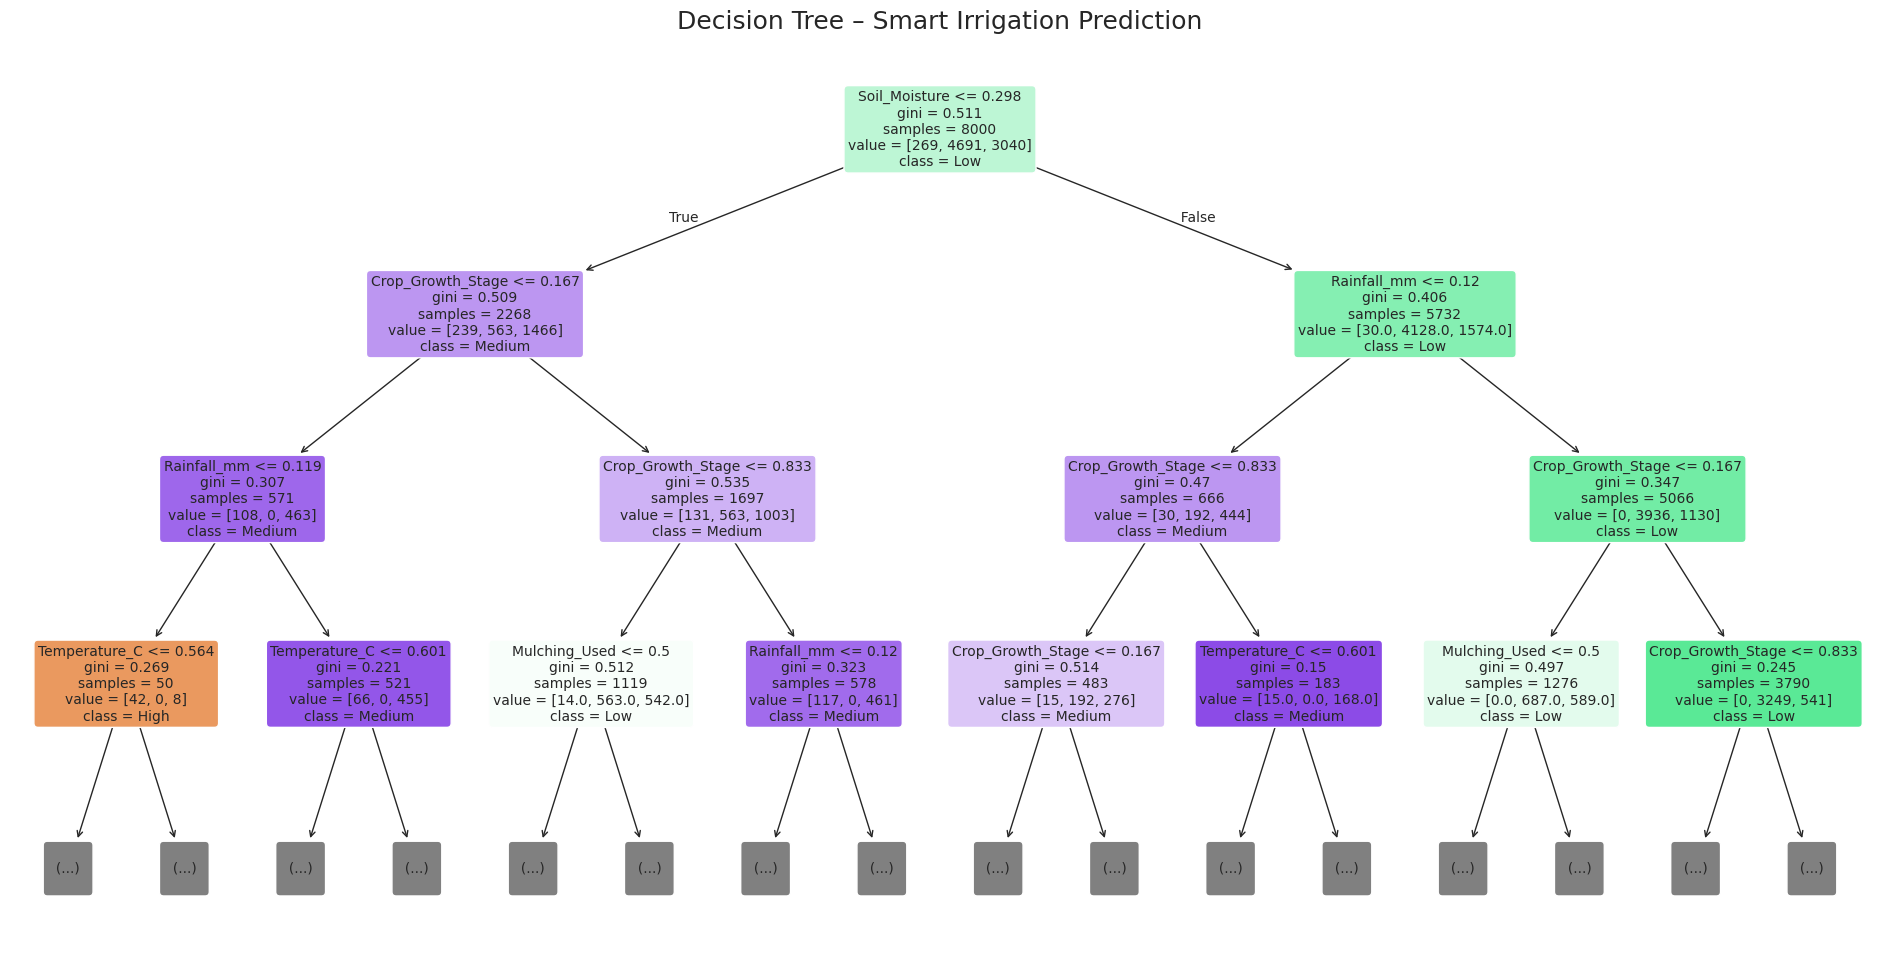

Decision Tree image saved as decision_tree_irrigation.png ✔️


In [55]:
# =========================
# 11. DECISION TREE VISUALIZATION (LINKEDIN READY)
# =========================
from sklearn.tree import plot_tree

plt.figure(figsize=(24,12))
plot_tree(
    models["Decision Tree"],
    feature_names=X.columns,
    class_names=[str(c) for c in models["Decision Tree"].classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)

plt.title("Decision Tree – Smart Irrigation Prediction", fontsize=18)
plt.savefig("decision_tree_irrigation.png", dpi=300, bbox_inches="tight")
plt.show()

print("Decision Tree image saved as decision_tree_irrigation.png ✔️")
